## Investigation On Intervals and Determine whether it's meal

In [2]:
import meals as ml
import tools as tl
import paths
import intervals as invs

In [4]:
flip_ctrl_meal_count = []
for path in paths.contigency_flip_ctrl:
    test = ml.process_csv(path)
    avg = round(len(ml.find_meals(test)) / ml.experiment_duration(test), 2)
    flip_ctrl_meal_count.append(avg)
flip_ctrl_meal_count

[18.47, 20.14, 20.68, 21.2, 18.23, 25.04]

In [5]:
flip_cask_meal_count = []
for path in paths.contigency_flip_cask:
    test = ml.process_csv(path)
    avg = round(len(ml.find_meals(test)) / ml.experiment_duration(test), 2)
    flip_cask_meal_count.append(avg)
flip_cask_meal_count

[21.82, 23.29, 18.65, 31.19, 37.4, 15.26, 23.74, 24.75, 24.38]

In [6]:
invs.perform_T_test(fr1_ctrl_meal_count, flip_ctrl_meal_count)

P Value is  0.011665105595407324
There is a significant difference between the two groups.


In [7]:
invs.perform_T_test(fr1_cask_meal_count, flip_cask_meal_count)

P Value is  0.8341304458090785
There is no significant difference between the two groups.


In [8]:
invs.perform_T_test(flip_ctrl_meal_count, flip_cask_meal_count)

P Value is  0.19212052406368524
There is no significant difference between the two groups.


### Control Group

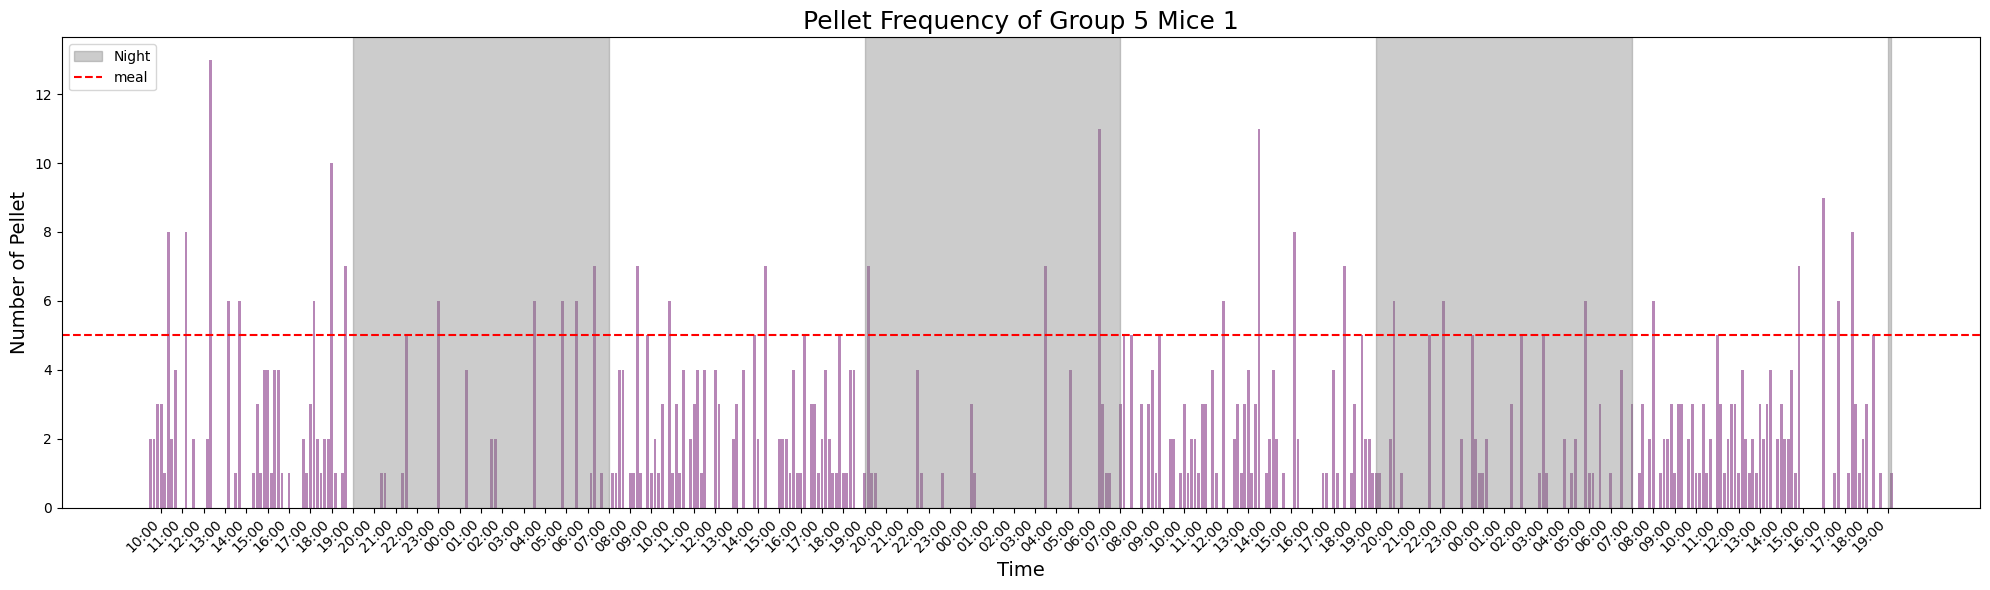

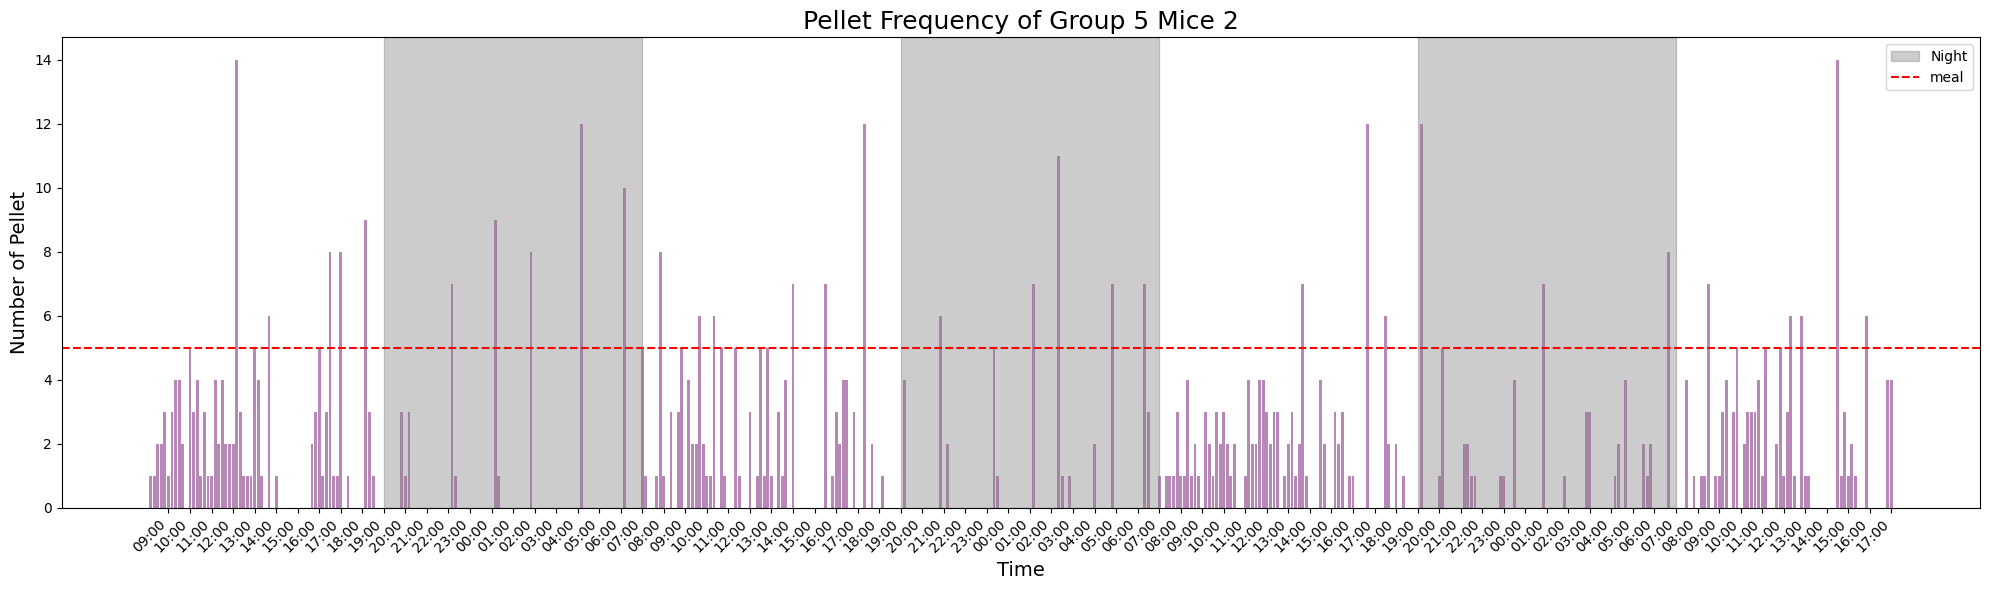

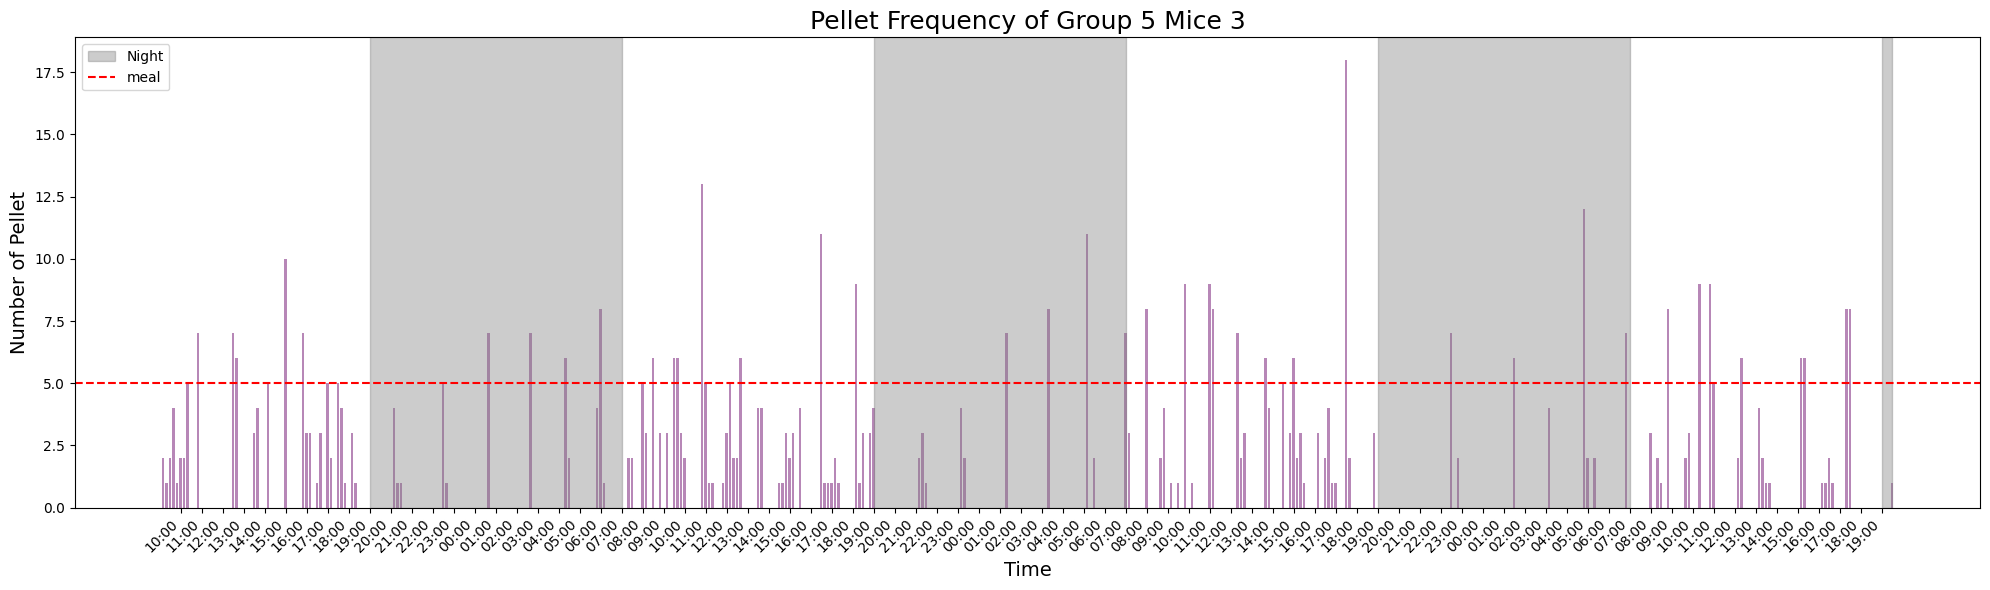

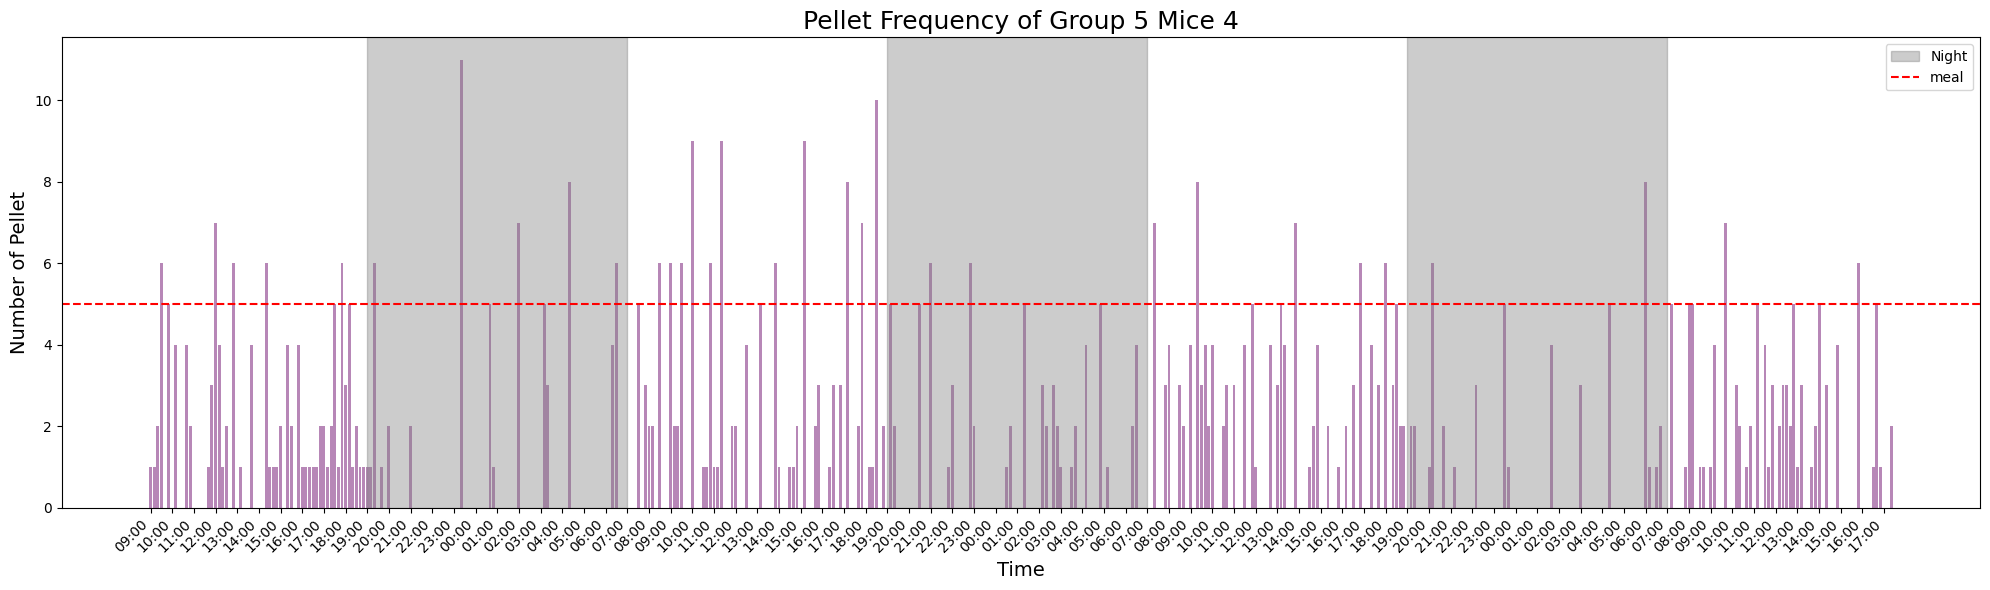

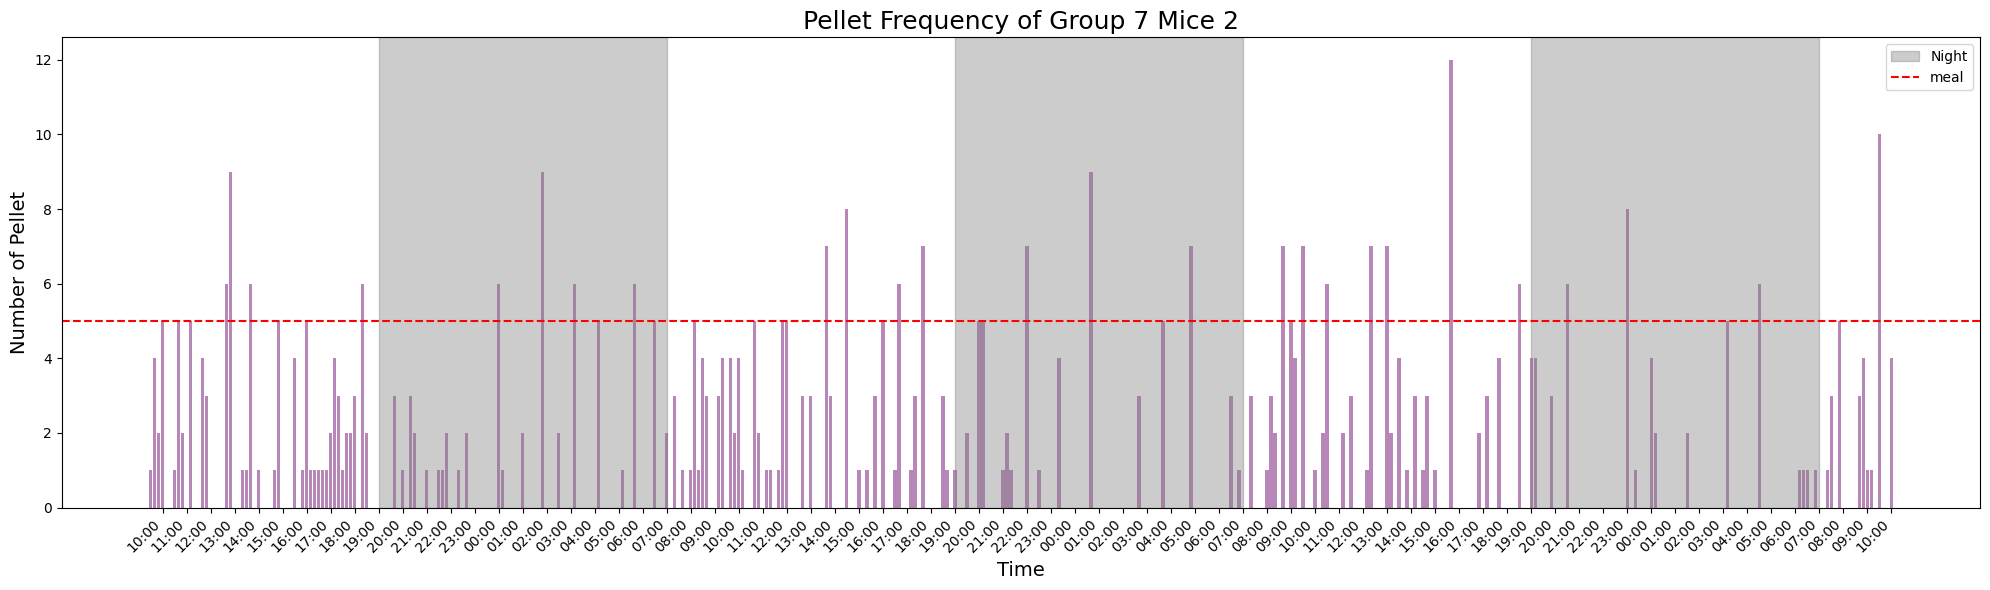

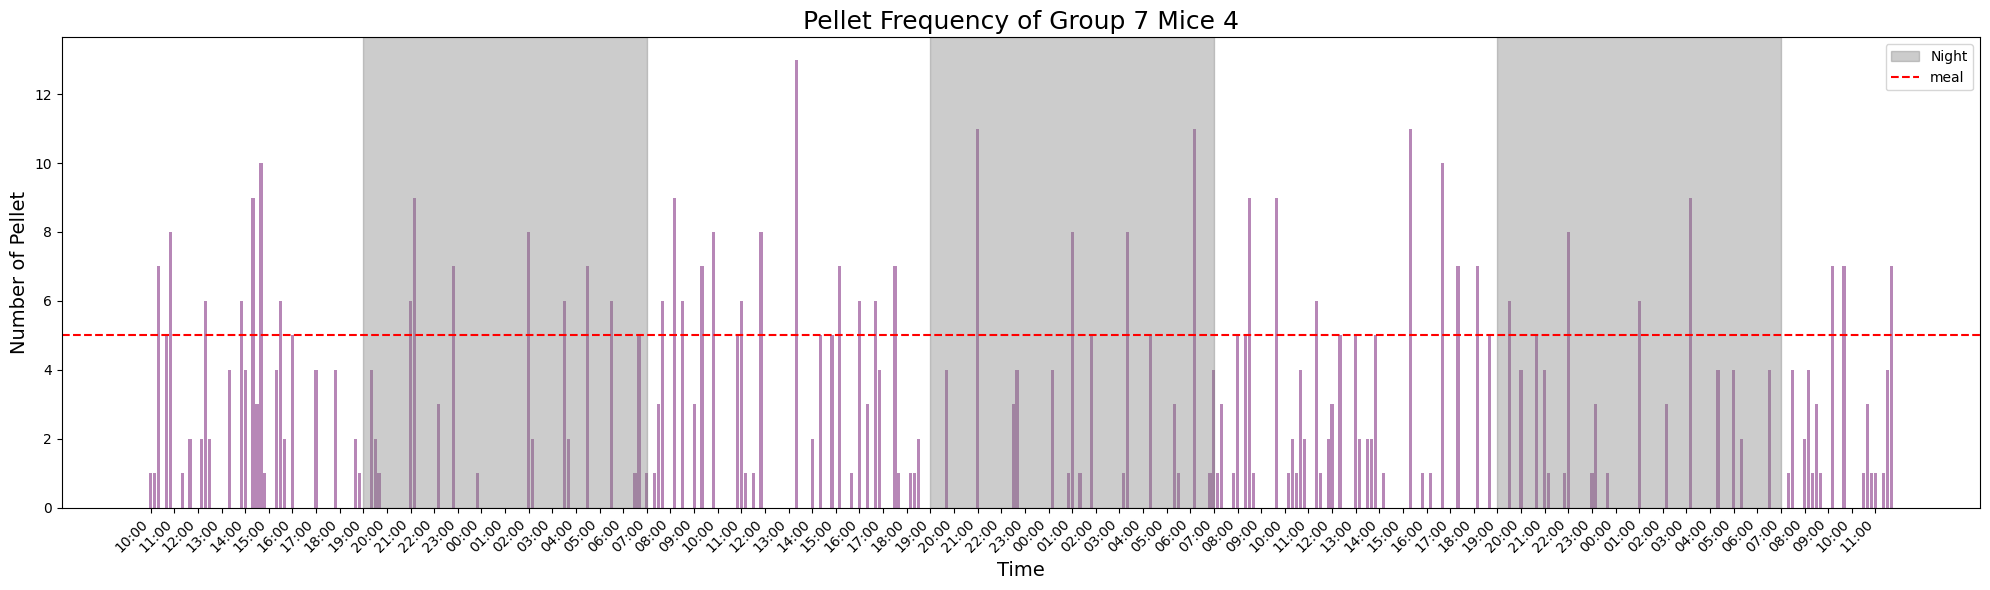

In [9]:
ctrl_avg_interval = []
for path in paths.contigency_flip_ctrl:
    data = ml.process_csv(path)
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(path)
    ctrl_avg_interval.append(ml.average_pellet(group))
    ml.graph_pellet_frequency(group, bhv, num)

### Cask Group

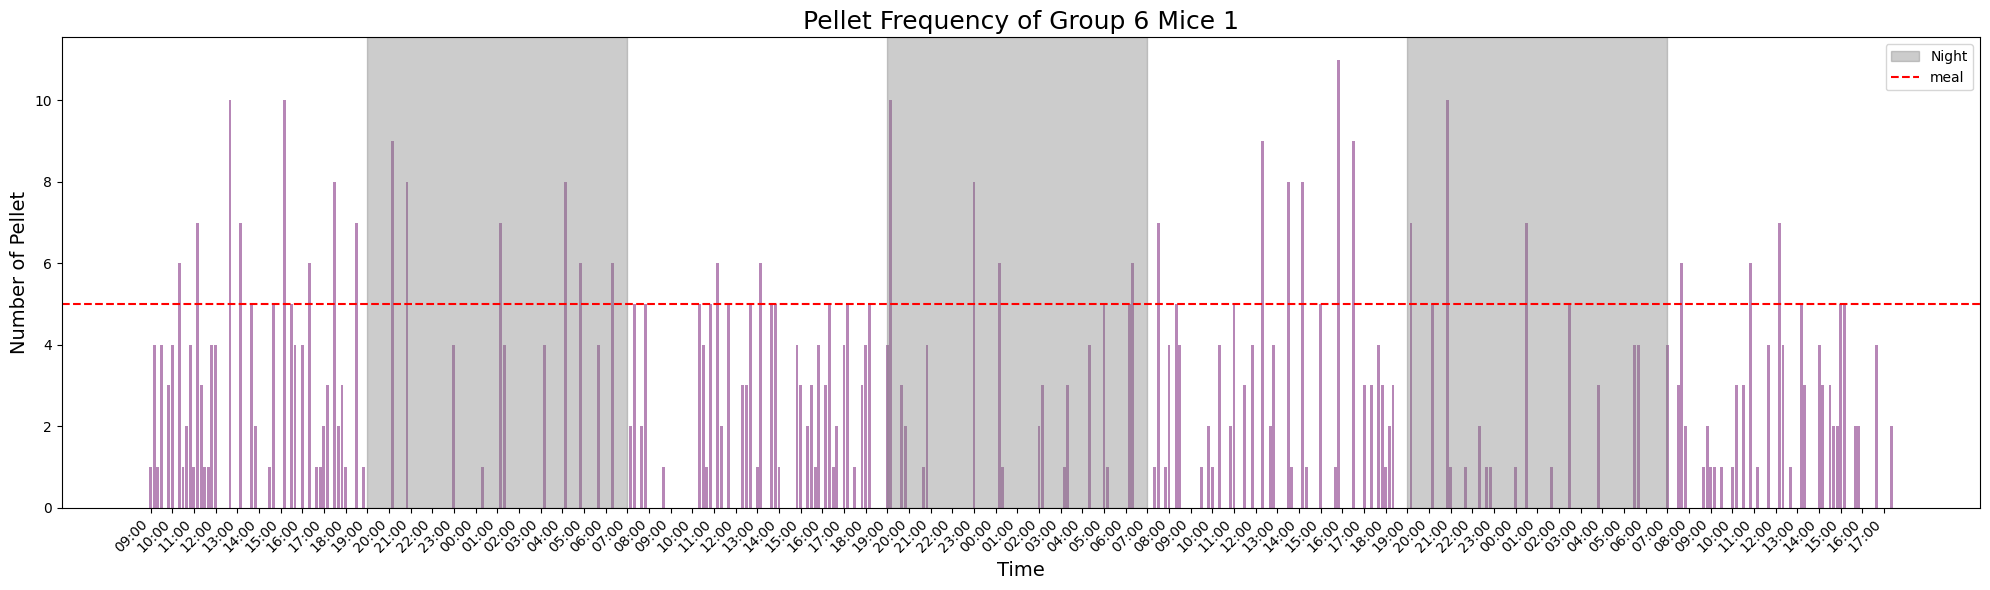

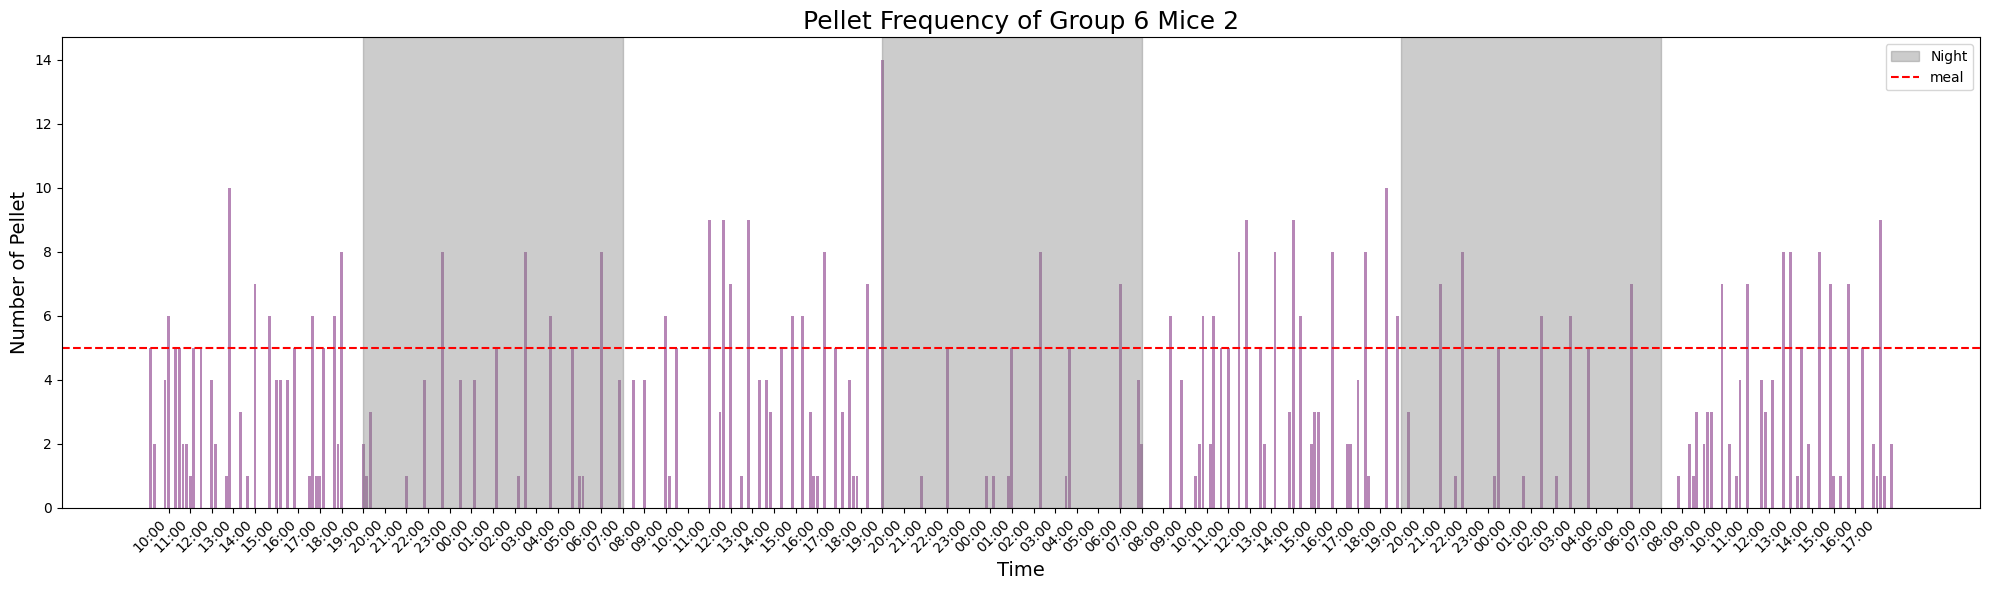

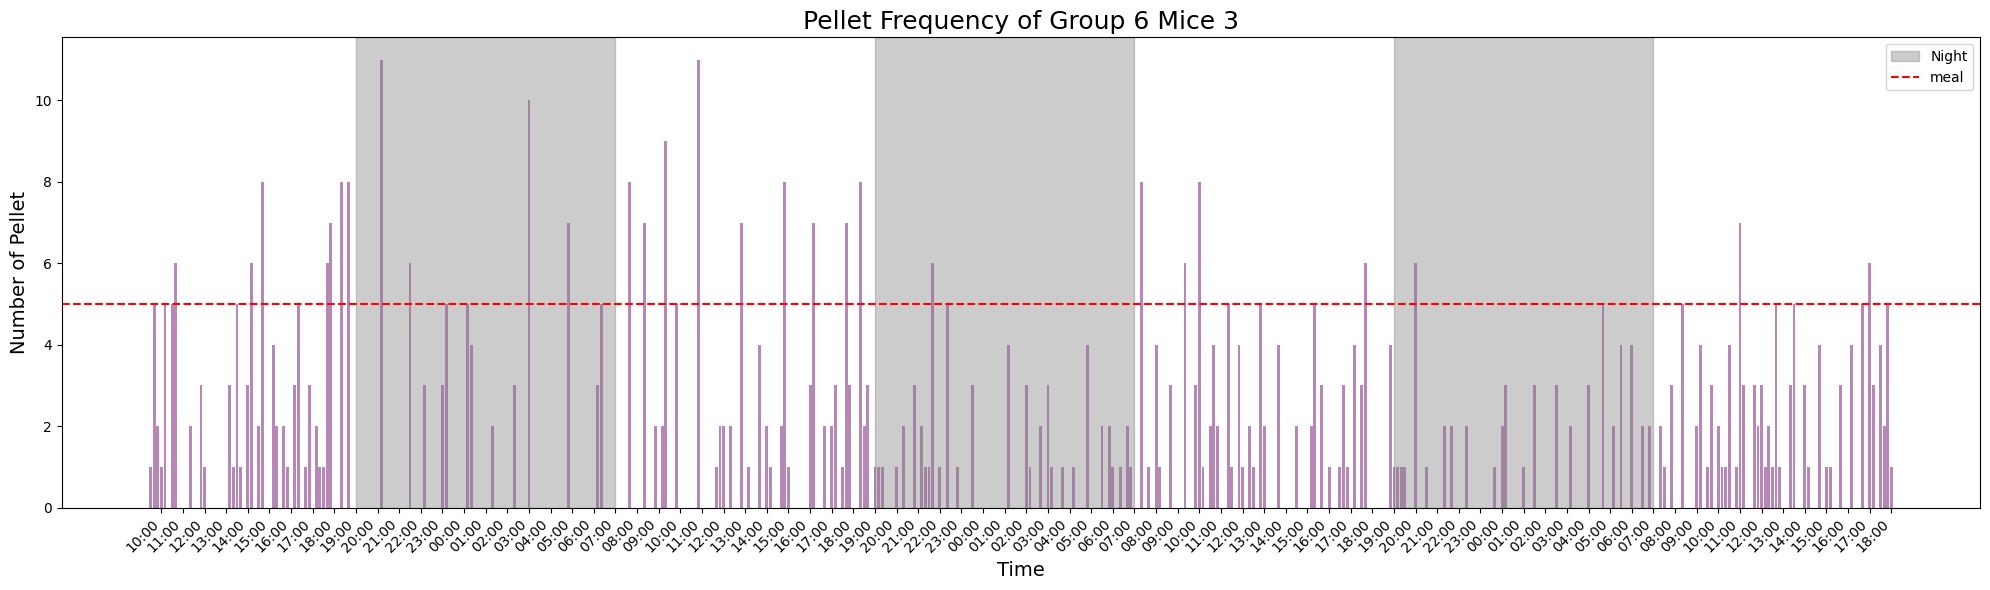

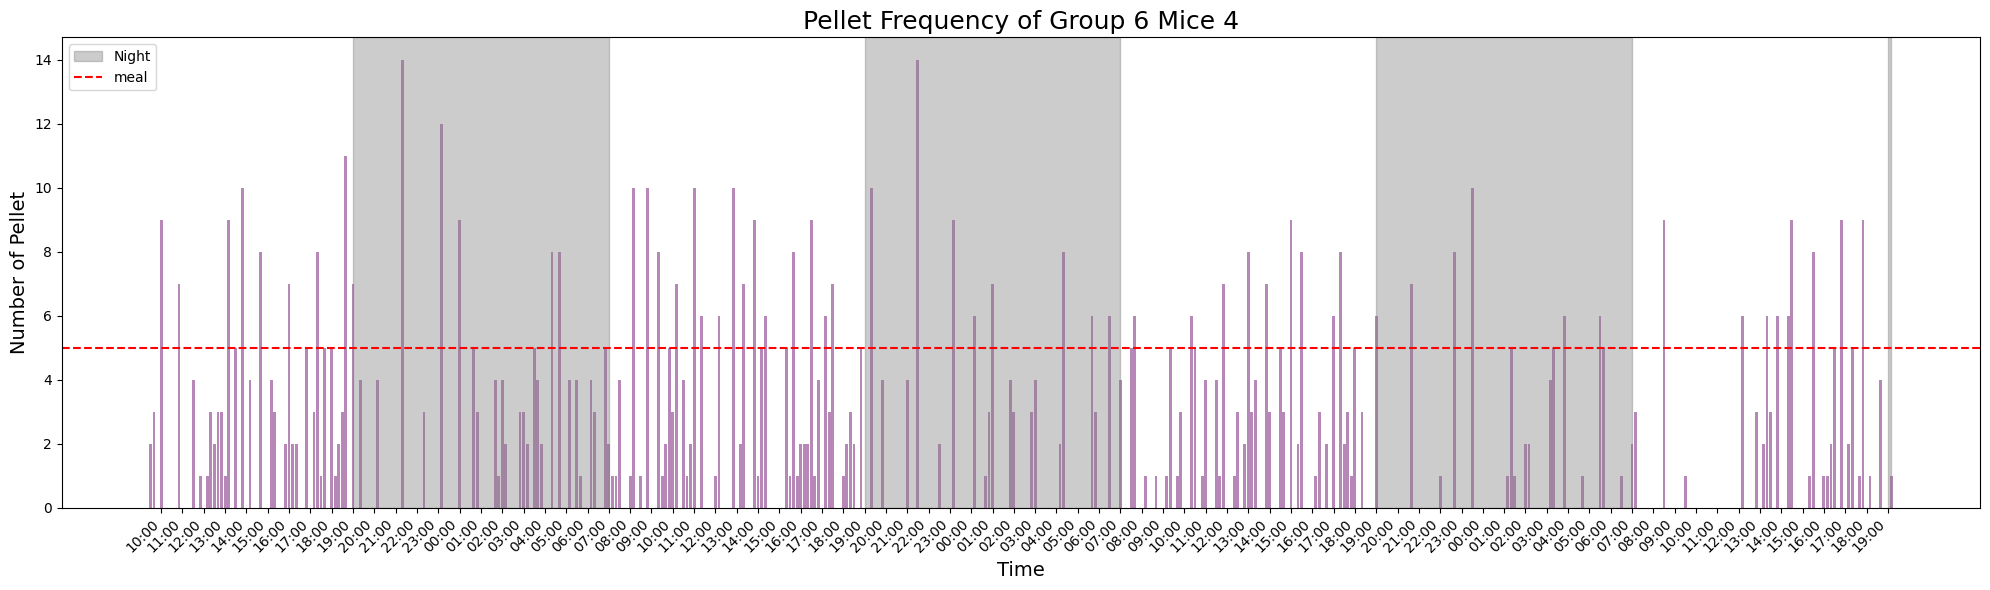

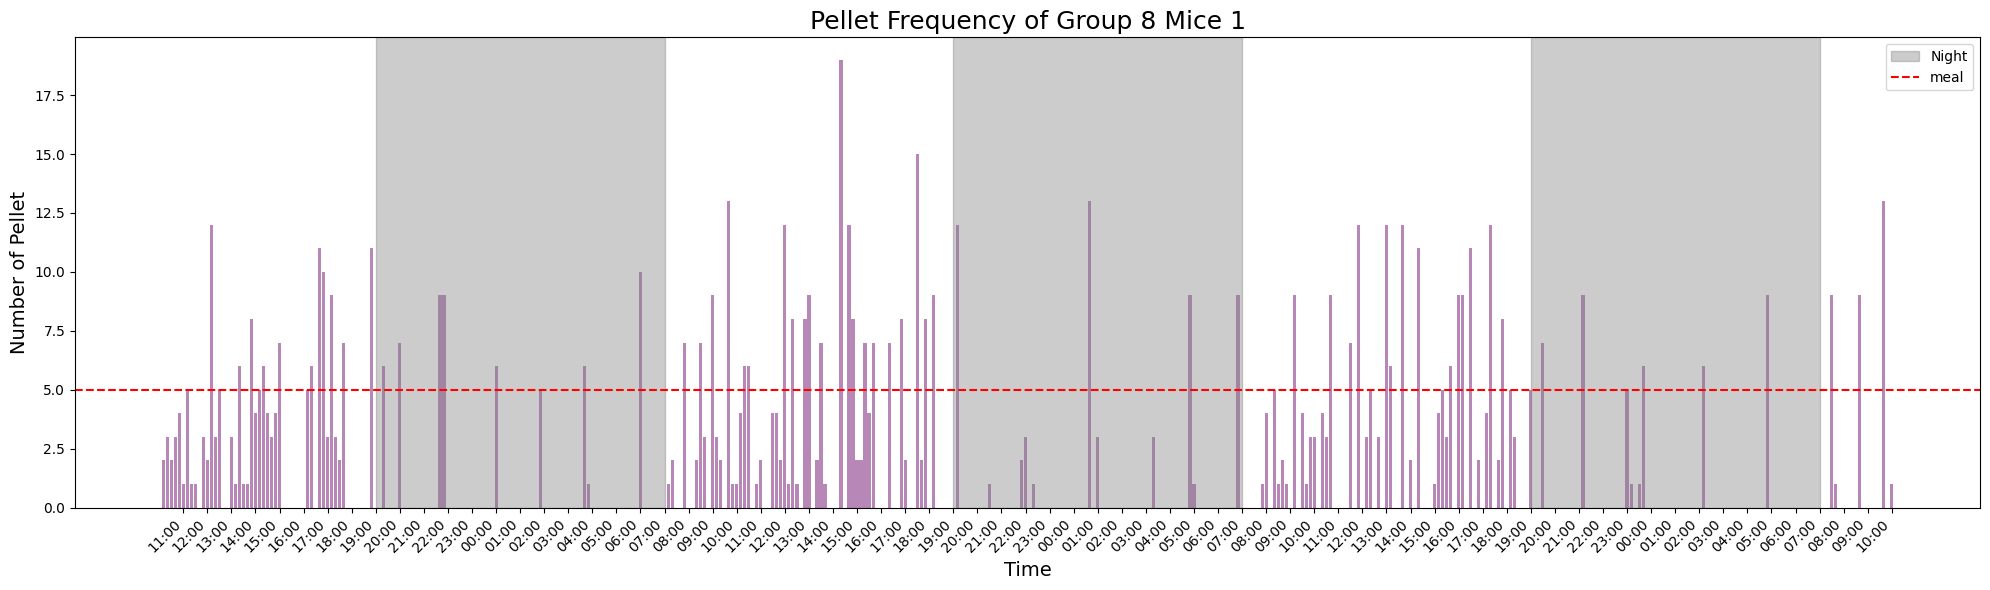

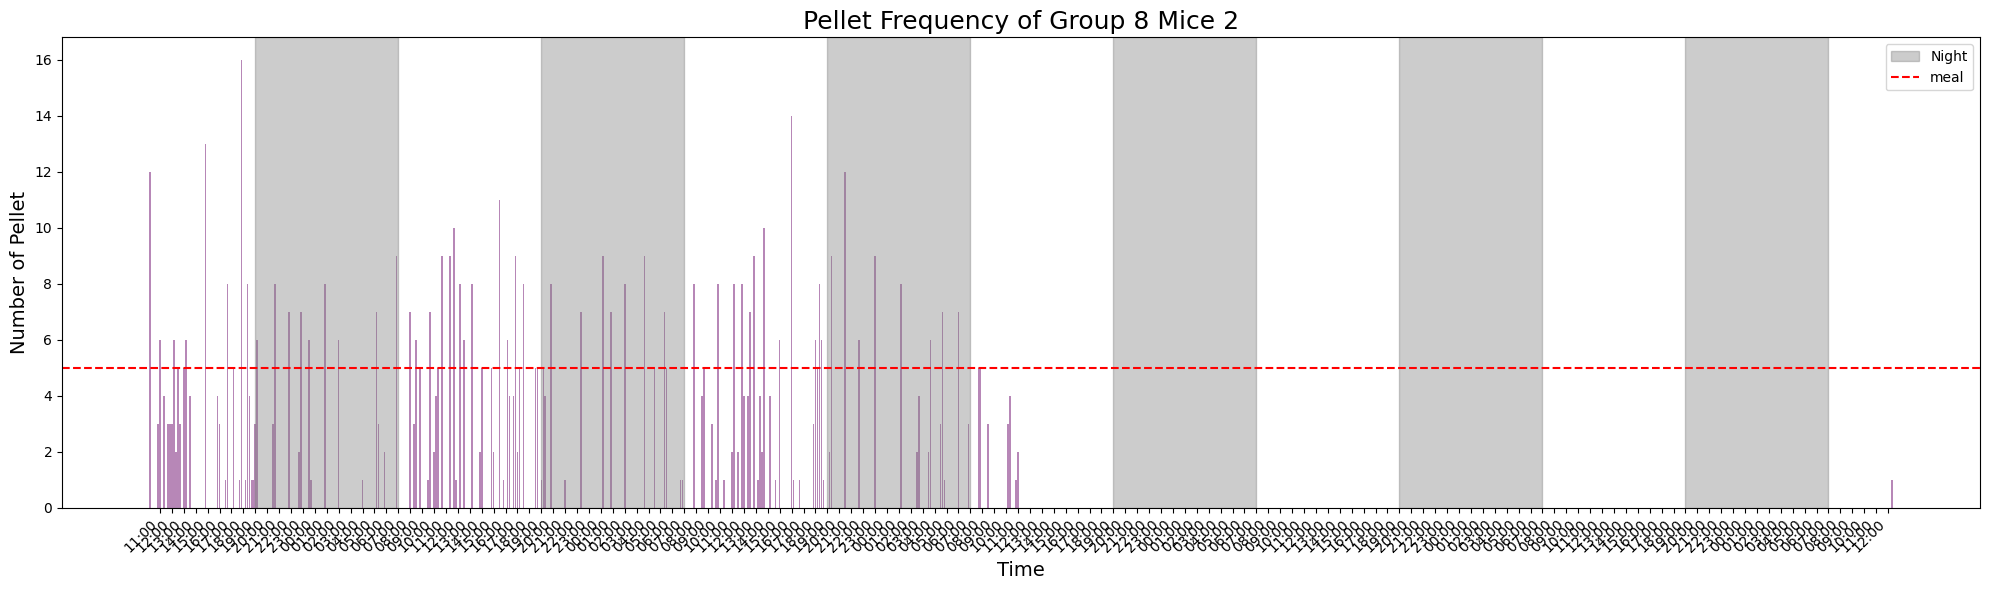

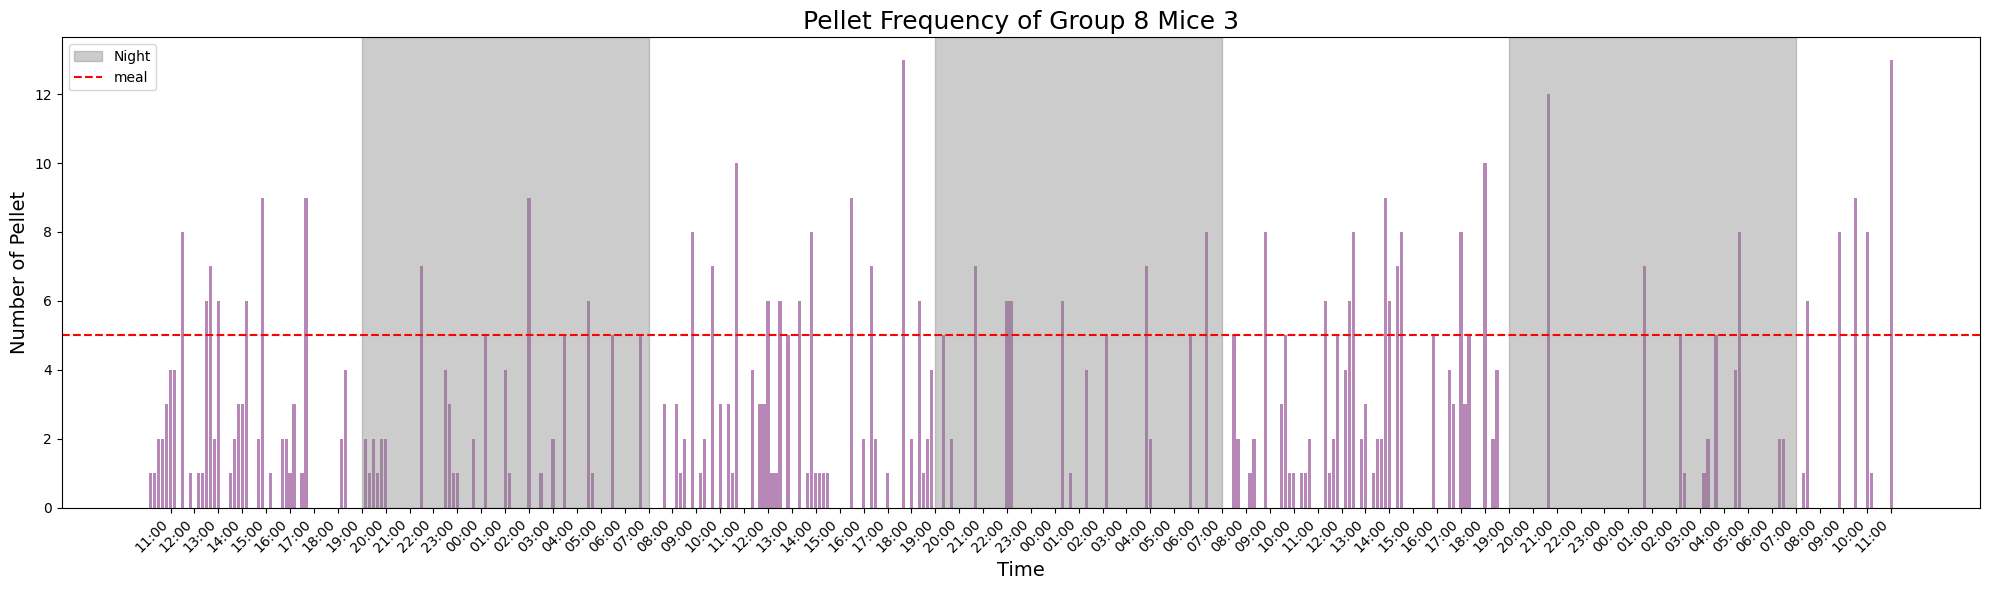

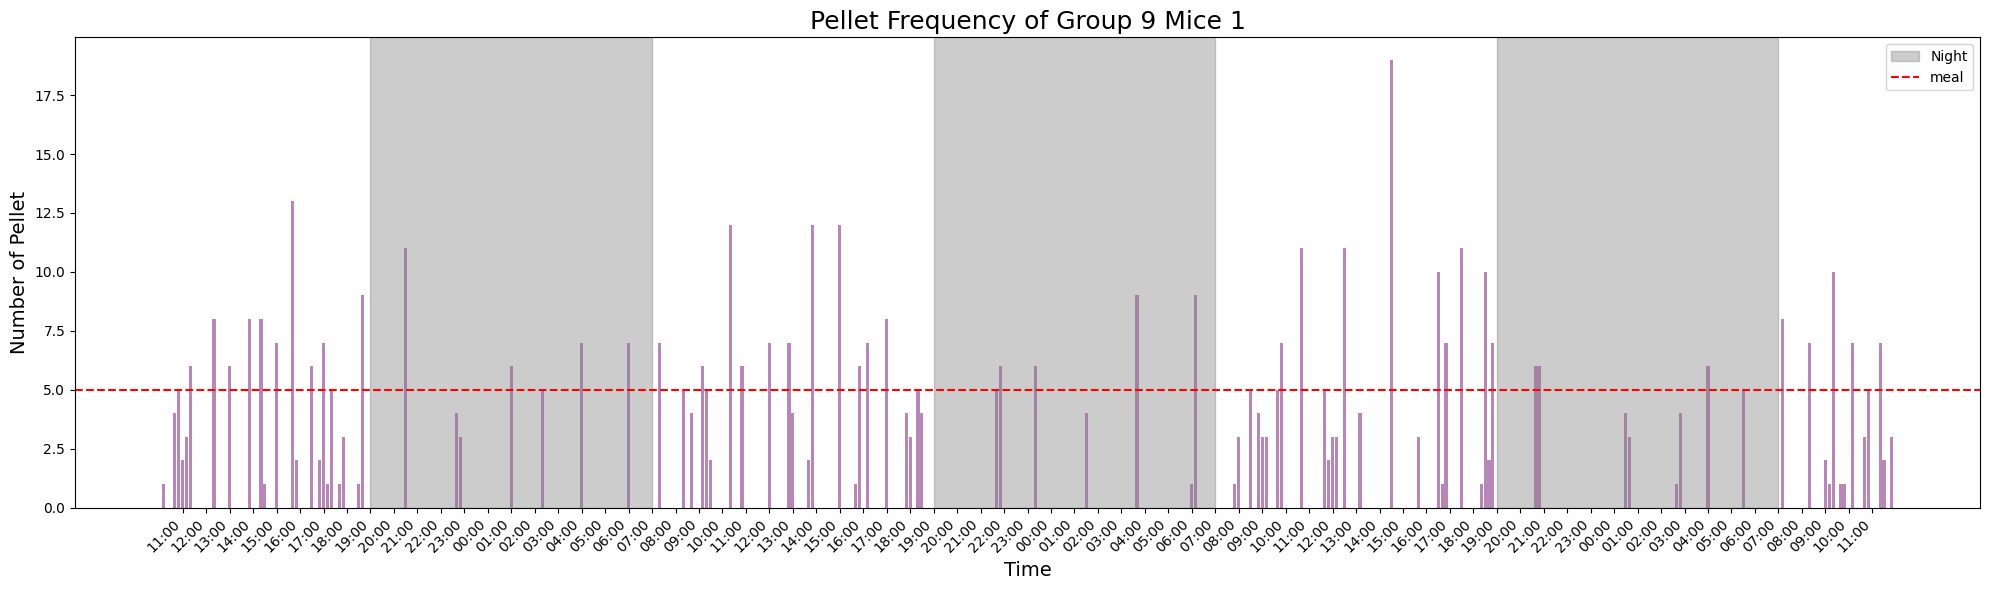

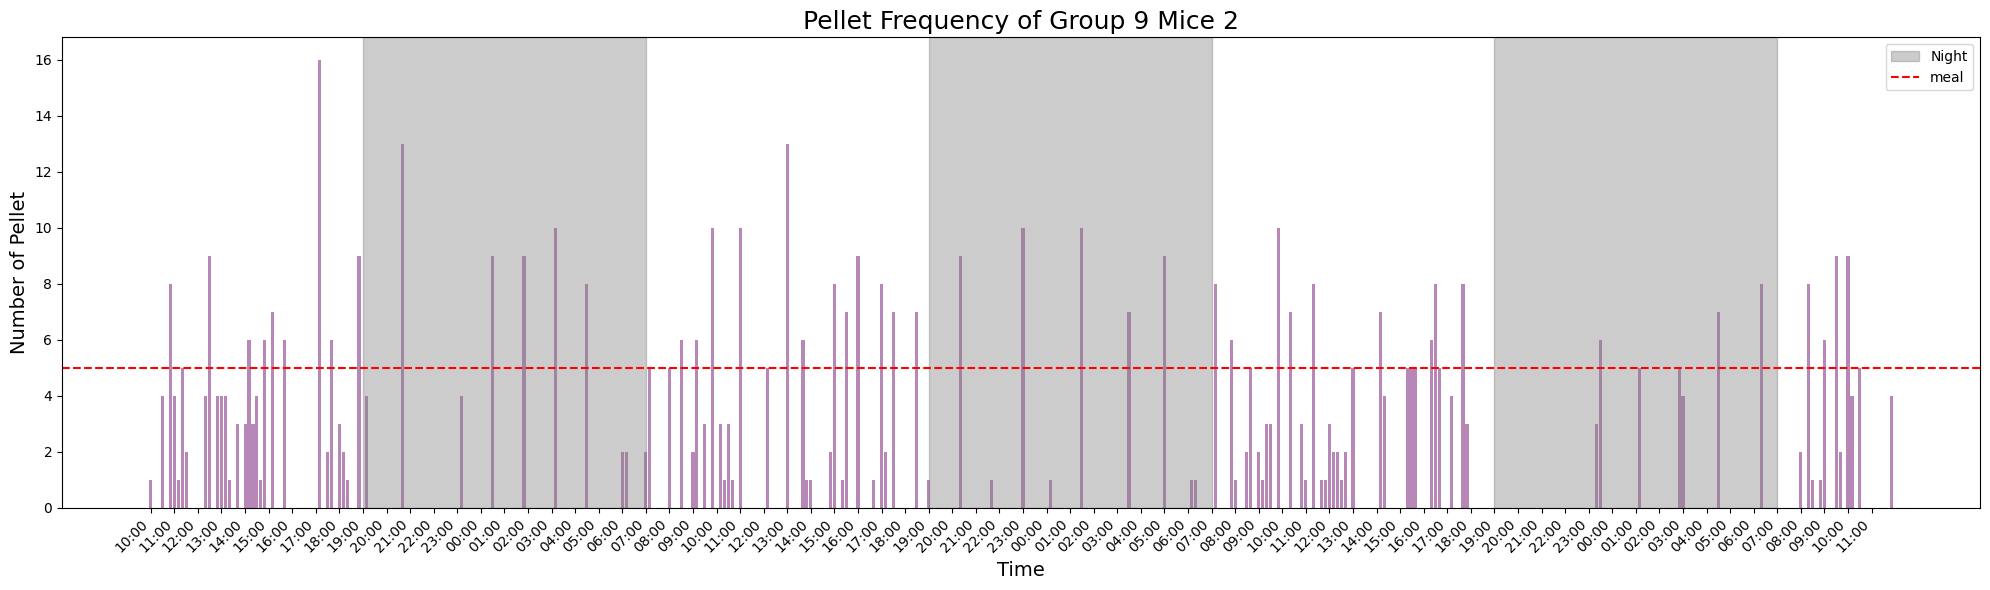

In [10]:
cask_avg_interval = []
for path in paths.contigency_flip_cask:
    data = ml.process_csv(path)
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(path)
    cask_avg_interval.append(ml.average_pellet(group))
    ml.graph_pellet_frequency(group, bhv, num)

### Pellet Interval Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import intervals as invs

alpha = 0.1

/var/folders/kk/3lqkkjzx7kb59yj16vgzwnyh0000gn/T/ipykernel_5165/4146190863.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Group", y="Value", data=data, palette="pastel",
/var/folders/kk/3lqkkjzx7kb59yj16vgzwnyh0000gn/T/ipykernel_5165/4146190863.py:17: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.4'}` instead.

  ax = sns.barplot(x="Group", y="Value", data=data, palette="pastel",


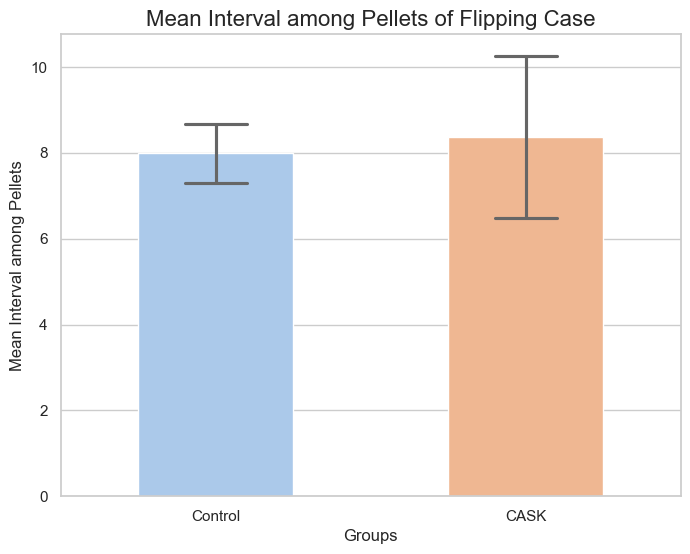

In [12]:
average = [
    np.mean(ctrl_avg_interval),
    np.mean(cask_avg_interval)
]

# Create DataFrames for each group
data_ctrl = pd.DataFrame({'Group': 'Control', 'Value': ctrl_avg_interval})
data_cask = pd.DataFrame({'Group': 'CASK', 'Value': cask_avg_interval})

# Concatenate the two DataFrames
data = pd.concat([data_ctrl, data_cask])

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the bar plot with error bars
ax = sns.barplot(x="Group", y="Value", data=data, palette="pastel",
                 errorbar="sd", capsize=0.2, width=0.5, errcolor='0.4')

plt.title('Mean Interval among Pellets of Flipping Case', fontsize=16)
plt.xlabel('Groups')
plt.ylabel('Mean Interval among Pellets')
plt.show()


In [26]:
ctrl_avg_interval

[8.743, 8.449, 7.142, 8.203, 7.131, 8.253]

In [14]:
invs.perform_T_test(ctrl_avg_interval, cask_avg_interval, 0.1)

P Value is  0.6460661792629312
There is no significant difference between the two groups.


### Control Flip

In [15]:
ctrl_flip_avg = []
for path in paths.contigency_flip_ctrl:
    data = ml.process_csv(path)
    interval = invs.count_interval(data)
    avg = np.sum(interval) / len(interval)
    ctrl_flip_avg.append(avg)

### CASK Flip

In [16]:
cask_flip_avg = []
for path in paths.contigency_flip_cask:
    data = ml.process_csv(path)
    interval = invs.count_interval(data)
    avg = np.sum(interval) / len(interval)
    cask_flip_avg.append(avg)

##### Control flip && cask flip

In [17]:
invs.perform_T_test(ctrl_flip_avg, cask_flip_avg, 0.1)

P Value is  0.10600696788923787
There is no significant difference between the two groups.


## Interval Investigation for FR1 Group

In [18]:
path = '../behavior data integrated/Adjusted FED3 Data.xlsx'

#### Control FR1

In [19]:
ctrl_fr1_interval = []

for sheet in paths.fr1_ctrl_sheet:
    data = ml.process_sheet(path, sheet=sheet)
    interval = invs.count_interval(data)
    avg = np.sum(interval) / len(interval)
    ctrl_fr1_interval.append(avg)

##### Control FR1 && Control Flip

In [20]:
invs.perform_T_test(ctrl_fr1_interval, ctrl_flip_avg, 0.1)

P Value is  0.49460560904152995
There is no significant difference between the two groups.


### Cask FR1

In [21]:
cask_fr1_interval = []

for path in paths.fr1_cask_csvs:
    data = ml.process_csv(path)
    interval = invs.count_interval(data)
    avg = np.sum(interval) / len(interval)
    cask_fr1_interval.append(avg)

##### FR1 control && FR1 Cask

In [22]:
invs.perform_T_test(cask_fr1_interval, ctrl_fr1_interval)

P Value is  0.4169114469111278
There is no significant difference between the two groups.


CASK flip and fr1

In [23]:
invs.perform_T_test(cask_flip_avg, cask_fr1_interval)

P Value is  0.064951807030107
There is no significant difference between the two groups.


Control flip and fr1

In [24]:
invs.perform_T_test(ctrl_fr1_interval, ctrl_flip_avg)

P Value is  0.49460560904152995
There is no significant difference between the two groups.


* Average Interval also matches the FR1 case that experimental group has larger variance in average intervals.
* no significance difference between all average intervals